### Importing pandas library to read, analyze datasets and generate reports for Goodcabs, a cab service company

In [1]:
import pandas as pd
import numpy as np

In [2]:
# reading datasets into pandas dataframe
df_dim_city = pd.read_csv("dim_city.csv")
df_dim_date = pd.read_csv("dim_date.csv")
df_dim_rtd = pd.read_csv("dim_repeat_trip_distribution.csv")
df_fact_ps = pd.read_csv("fact_passenger_summary.csv")
df_fact_trips = pd.read_csv("fact_trips.csv")
df_target_np = pd.read_csv("monthly_target_new_passengers.csv")
df_target_trips = pd.read_csv("monthly_target_trips.csv")

### 1(a). Top 3  cities by Total trips

<Axes: ylabel='city_name'>

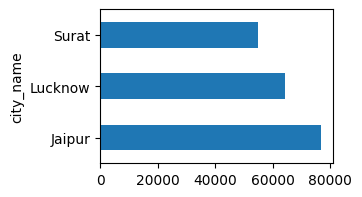

In [3]:
df_total_trips = pd.merge(df_dim_city,df_fact_trips,on="city_id")
df_top_3 = df_total_trips.groupby("city_name")["trip_id"].count().sort_values(ascending=False).head(3)
df_top_3.plot(kind="barh",figsize=(3,2))

### 1(b). Bottom 3  cities by Total trips

<Axes: ylabel='city_name'>

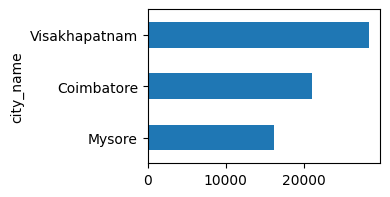

In [4]:
df_bottom_3 = df_total_trips.groupby("city_name")["trip_id"].count().sort_values(ascending=True).head(3)
df_bottom_3.plot(kind="barh",figsize=(3,2))

### 2. Average fare per trip by city compared with city's average trip distance

In [5]:
df_total_trips.groupby("city_name")[["fare_amount","distance_travelled(km)"]].mean().round(2).sort_values("fare_amount")

,fare_amount,distance_travelled(km)
city_name,,
Surat,117.27,11.00
Vadodara,118.57,11.52
Lucknow,147.18,12.51
Coimbatore,166.98,14.98
Indore,179.84,16.50
Mysore,249.71,16.50
Visakhapatnam,282.67,22.55
Chandigarh,283.69,23.52
Kochi,335.25,24.07


### 3. Average ratings by city and passenger type
####    sorted by passenger rating in descending order

In [6]:
df_ratings = df_total_trips[["city_name","passenger_type","passenger_rating","driver_rating"]]
df_ratings.groupby(["passenger_type","city_name"])[["passenger_rating","driver_rating"]].mean().round(1).sort_values(by=["passenger_type","passenger_rating"],ascending=False)

passenger_rating  driver_rating
passenger_type city_name                                     
repeated       Jaipur                      8.0            9.0
               Kochi                       8.0            9.0
               Mysore                      8.0            9.0
               Visakhapatnam               8.0            9.0
               Chandigarh                  7.5            7.5
               Coimbatore                  7.5            7.5
               Indore                      7.5            7.5
               Lucknow                     6.0            6.5
               Surat                       6.0            6.5
               Vadodara                    6.0            6.5
new            Jaipur                      9.0            9.0
               Kochi                       9.0            9.0
               Mysore                      9.0            9.0
               Visakhapatnam               9.0            9.0
               Chandigarh                  8.5            8.0
               Coimbatore                  8.5            8.0
               Indore                      8.5            8.0
               Lucknow                     8.0            7.0
               Surat                       8.0            7.0
               Vadodara                    8.0            7.0

### 4. Peak and Low demand months by city

#### sorting the month name in correct calender order 

In [7]:
month_order = ['January',"February","March","April","May","June"]
df_dim_date["month_name"] = pd.Categorical(df_dim_date["month_name"],categories=month_order,ordered=True)


In [8]:
df_total_trips_months = pd.merge(df_total_trips,df_dim_date,on="date")
df_total_trips_months = df_total_trips_months[["city_name","month_name","trip_id"]]
df_total_trips_months = df_total_trips_months.groupby(["city_name","month_name"])["trip_id"].count().to_frame(name="Total_trips")
df_total_trips_months.unstack(level="month_name")


Total_trips                                     
month_name        January February  March  April    May   June
city_name                                                     
Chandigarh           6810     7387   6569   5566   6620   6029
Coimbatore           3651     3404   3680   3661   3550   3158
Indore               6737     7210   7019   7415   7787   6288
Jaipur              14976    15872  13317  11406  11475   9842
Kochi                7344     7688   9495   9762  10014   6399
Lucknow             10858    12060  11224  10212   9705  10240
Mysore               2485     2668   2633   2603   3007   2842
Surat                8358     9069   9267   9831   9774   8544
Vadodara             4775     5228   5598   5941   5799   4685
Visakhapatnam        4468     4793   4877   4938   4812   4478

### 5. Weekend vs Weekday trip demand by city

<Axes: xlabel='city_name'>

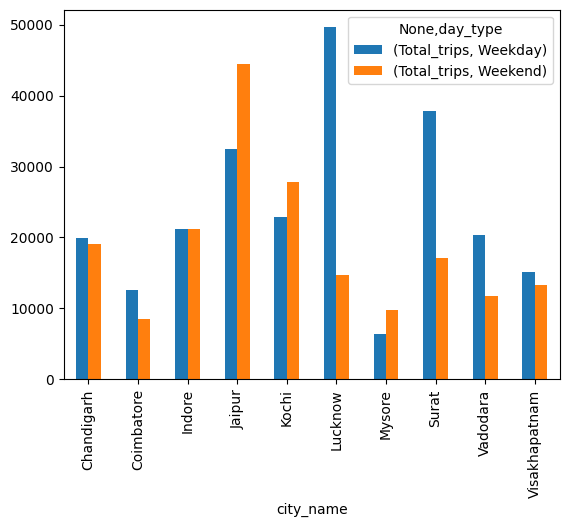

In [9]:
df_week = pd.merge(df_total_trips,df_dim_date,on="date")
df_week = df_week[["day_type","city_name","trip_id"]]
df_week_trips = df_week.groupby(["city_name","day_type"])["trip_id"].count().to_frame(name="Total_trips")
df_week_trips.unstack(level="day_type").plot(kind="bar")

### 6. Repeat passenger frequency and city contribution analysis

In [10]:
df_repeat = pd.merge(df_dim_rtd,df_dim_city,on="city_id")
df_repeat = df_repeat[["city_name","trip_count","repeat_passenger_count"]]
df_repeat_passengers = df_repeat.groupby(["city_name","trip_count"])["repeat_passenger_count"].sum()
df_repeat_passengers = df_repeat_passengers.unstack(level="trip_count")
columns = df_repeat_passengers.columns.tolist()  # Get all column names as a list
columns.remove('10-Trips')     # Remove '10-Trips' from the list
columns.append('10-Trips')     # Append '10-Trips' to the end
df_repeat_passengers = df_repeat_passengers[columns]
df_repeat_passengers

trip_count,2-Trips,3-Trips,4-Trips,5-Trips,6-Trips,7-Trips,8-Trips,9-Trips,10-Trips
city_name,,,,,,,,,
Chandigarh,1638,976,798,619,376,278,176,118,91
Coimbatore,286,378,397,526,450,267,157,59,31
Indore,2478,1637,967,746,494,378,235,172,109
Jaipur,4855,2007,1173,609,400,244,184,116,94
Kochi,3635,1857,901,494,298,161,126,92,62
Lucknow,927,1417,1555,1768,1937,1087,617,183,106
Mysore,720,361,188,86,60,26,21,8,7
Surat,843,1232,1430,1706,1594,1027,539,150,117
Vadodara,429,616,718,785,829,559,251,89,70


In [11]:
trip_sum = df_repeat_passengers.sum(axis=1)
df_repeat_passengers = df_repeat_passengers.div(trip_sum,axis=0).multiply(100).round()
df_repeat_passengers.applymap(lambda x:str(x)+"%")

trip_count,2-Trips,3-Trips,4-Trips,5-Trips,6-Trips,7-Trips,8-Trips,9-Trips,10-Trips
city_name,,,,,,,,,
Chandigarh,32.0%,19.0%,16.0%,12.0%,7.0%,5.0%,3.0%,2.0%,2.0%
Coimbatore,11.0%,15.0%,16.0%,21.0%,18.0%,10.0%,6.0%,2.0%,1.0%
Indore,34.0%,23.0%,13.0%,10.0%,7.0%,5.0%,3.0%,2.0%,2.0%
Jaipur,50.0%,21.0%,12.0%,6.0%,4.0%,3.0%,2.0%,1.0%,1.0%
Kochi,48.0%,24.0%,12.0%,6.0%,4.0%,2.0%,2.0%,1.0%,1.0%
Lucknow,10.0%,15.0%,16.0%,18.0%,20.0%,11.0%,6.0%,2.0%,1.0%
Mysore,49.0%,24.0%,13.0%,6.0%,4.0%,2.0%,1.0%,1.0%,0.0%
Surat,10.0%,14.0%,17.0%,20.0%,18.0%,12.0%,6.0%,2.0%,1.0%
Vadodara,10.0%,14.0%,17.0%,18.0%,19.0%,13.0%,6.0%,2.0%,2.0%


### 7. Monthly Target Achievement Analysis for Key metrics

#### a. Target analysis for new passengers

In [12]:
df_target_np.head(3)

,month,city_id,target_new_passengers
0,2024-05-01,GJ01,1500
1,2024-05-01,GJ02,1500
2,2024-03-01,GJ01,2000


In [13]:
df_fact_ps.head(3)

,month,city_id,new_passengers,repeat_passengers,total_passengers
0,2024-01-01,AP01,2513,650,3163
1,2024-01-01,CH01,3920,720,4640
2,2024-01-01,GJ01,2432,1184,3616


In [14]:
# joining passenger summary with target passsengers table for target comparison
df_target_new_passengers = pd.merge(df_fact_ps,df_target_np,on=["city_id","month"])
df_target_new_passengers  =df_target_new_passengers[["city_id","month","new_passengers","target_new_passengers"]]
df_target_new_passengers.head(3)

,city_id,month,new_passengers,target_new_passengers
0,AP01,2024-01-01,2513,2500
1,CH01,2024-01-01,3920,4000
2,GJ01,2024-01-01,2432,2000


In [15]:
# joining with dim_city to get city name
df_target_new_passengers = pd.merge(df_target_new_passengers,df_dim_city,on="city_id")
df_target_new_passengers.head()

,city_id,month,new_passengers,target_new_passengers,city_name
0,AP01,2024-01-01,2513,2500,Visakhapatnam
1,AP01,2024-02-01,2380,2500,Visakhapatnam
2,AP01,2024-03-01,2170,2500,Visakhapatnam
3,AP01,2024-04-01,1845,2000,Visakhapatnam
4,AP01,2024-05-01,1939,2000,Visakhapatnam


In [16]:
df_target_new_passengers = df_target_new_passengers[["city_name","month","new_passengers","target_new_passengers"]]
df_target_new_passengers.head()

,city_name,month,new_passengers,target_new_passengers
0,Visakhapatnam,2024-01-01,2513,2500
1,Visakhapatnam,2024-02-01,2380,2500
2,Visakhapatnam,2024-03-01,2170,2500
3,Visakhapatnam,2024-04-01,1845,2000
4,Visakhapatnam,2024-05-01,1939,2000


In [17]:
# joining with dim_date to get month name
df_target_new_passengers = pd.merge(df_target_new_passengers,df_dim_date,left_on="month",right_on="start_of_month")
df_target_new_passengers.head()

,city_name,month,new_passengers,target_new_passengers,date,start_of_month,month_name,day_type
0,Visakhapatnam,2024-01-01,2513,2500,2024-01-01,2024-01-01,January,Weekday
1,Visakhapatnam,2024-01-01,2513,2500,2024-01-02,2024-01-01,January,Weekday
2,Visakhapatnam,2024-01-01,2513,2500,2024-01-03,2024-01-01,January,Weekday
3,Visakhapatnam,2024-01-01,2513,2500,2024-01-04,2024-01-01,January,Weekday
4,Visakhapatnam,2024-01-01,2513,2500,2024-01-05,2024-01-01,January,Weekday


In [18]:
df_tnp = df_target_new_passengers[["city_name","month_name","new_passengers","target_new_passengers"]]
df_tnp.head(5)

,city_name,month_name,new_passengers,target_new_passengers
0,Visakhapatnam,January,2513,2500
1,Visakhapatnam,January,2513,2500
2,Visakhapatnam,January,2513,2500
3,Visakhapatnam,January,2513,2500
4,Visakhapatnam,January,2513,2500


In [19]:
# grouping by city and month for target comparison
df_tnp = df_tnp.groupby(["city_name","month_name"]).agg({'new_passengers': 'sum', 'target_new_passengers': 'sum'})
df_tnp.head()

new_passengers  target_new_passengers
city_name  month_name                                       
Chandigarh January             121520                 124000
           February            119016                 116000
           March               100068                 124000
           April                74880                  90000
           May                  84630                  93000

In [20]:
# calculating new column "metric met"
df_tnp["metric_met"] = np.where(df_tnp["new_passengers"]>df_tnp["target_new_passengers"],"exceeded","missed the target")
df_tnp.head(6)

new_passengers  target_new_passengers  \
city_name  month_name                                          
Chandigarh January             121520                 124000   
           February            119016                 116000   
           March               100068                 124000   
           April                74880                  90000   
           May                  84630                  93000   
           June                 72900                  90000   

                              metric_met  
city_name  month_name                     
Chandigarh January     missed the target  
           February             exceeded  
           March       missed the target  
           April       missed the target  
           May         missed the target  
           June        missed the target

In [21]:
# calculating percentage difference for new passengers and target passengers
df_tnp["percentage_difference"] = ((df_tnp["new_passengers"]-df_tnp["target_new_passengers"])/df_tnp["target_new_passengers"])*100
df_tnp["percentage_difference"]  = df_tnp["percentage_difference"].round(1).astype(str)+"%"
df_tnp.head(6)

new_passengers  target_new_passengers  \
city_name  month_name                                          
Chandigarh January             121520                 124000   
           February            119016                 116000   
           March               100068                 124000   
           April                74880                  90000   
           May                  84630                  93000   
           June                 72900                  90000   

                              metric_met percentage_difference  
city_name  month_name                                           
Chandigarh January     missed the target                 -2.0%  
           February             exceeded                  2.6%  
           March       missed the target                -19.3%  
           April       missed the target                -16.8%  
           May         missed the target                 -9.0%  
           June        missed the target                -19.0%

#### b. Target analysis for total_trips

In [22]:
df_total_trips.head()

,city_id,city_name,trip_id,date,passenger_type,distance_travelled(km),fare_amount,passenger_rating,driver_rating
0,RJ01,Jaipur,TRPJAI2402294d7117f1,2024-02-29,new,41,529,10,9
1,RJ01,Jaipur,TRPJAI2402044fad4efc,2024-02-04,new,28,513,9,8
2,RJ01,Jaipur,TRPJAI24012860cb01fe,2024-01-28,new,42,751,9,9
3,RJ01,Jaipur,TRPJAI240401069620b1,2024-04-01,repeated,35,457,8,8
4,RJ01,Jaipur,TRPJAI24030443295958,2024-03-04,repeated,43,553,9,10


In [23]:
df_target_trips.head()

,month,city_id,total_target_trips
0,2024-03-01,MP01,7000
1,2024-05-01,KA01,2500
2,2024-04-01,UP01,11000
3,2024-02-01,GJ02,6000
4,2024-05-01,KL01,9000


In [24]:
df_target_trips_city = pd.merge(df_target_trips,df_dim_city,on="city_id")
df_target_trips_city = df_target_trips_city[["city_name","month","total_target_trips"]]
df_target_trips_city.head(6)

,city_name,month,total_target_trips
0,Indore,2024-03-01,7000
1,Indore,2024-04-01,7500
2,Indore,2024-02-01,7000
3,Indore,2024-05-01,7500
4,Indore,2024-06-01,7500
5,Indore,2024-01-01,7000


In [25]:
df_target_trips_month = pd.merge(df_target_trips_city,df_dim_date,left_on="month",right_on="start_of_month")
df_target_trips_month = df_target_trips_month[["city_name","month_name","total_target_trips"]]
df_target_trips_month.drop_duplicates(inplace=True)

In [26]:
df_target_trips_month.head(6)

,city_name,month_name,total_target_trips
0,Indore,March,7000
31,Mysore,March,2000
62,Lucknow,March,13000
93,Vadodara,March,6000
124,Kochi,March,7500
155,Visakhapatnam,March,4500


In [27]:
df_target_trips_month = df_target_trips_month.groupby(["city_name","month_name"])["total_target_trips"].sum().to_frame("target_trips")
df_target_trips_month.head(6)

target_trips
city_name  month_name              
Chandigarh January             7000
           February            7000
           March               7000
           April               6000
           May                 6000
           June                6000

In [28]:
df_total_trips_months.head()

Total_trips
city_name  month_name             
Chandigarh January            6810
           February           7387
           March              6569
           April              5566
           May                6620

In [29]:
df_target_trip_cmp = pd.merge(df_total_trips_months,df_target_trips_month,on=["city_name","month_name"])
df_target_trip_cmp.head()

Total_trips  target_trips
city_name  month_name                           
Chandigarh January            6810          7000
           February           7387          7000
           March              6569          7000
           April              5566          6000
           May                6620          6000

In [30]:
df_target_trip_cmp["metric met"] = np.where(df_target_trip_cmp["Total_trips"]>df_target_trip_cmp["target_trips"],"exceeded","missed the target")
df_target_trip_cmp.head(6)

Total_trips  target_trips         metric met
city_name  month_name                                              
Chandigarh January            6810          7000  missed the target
           February           7387          7000           exceeded
           March              6569          7000  missed the target
           April              5566          6000  missed the target
           May                6620          6000           exceeded
           June               6029          6000           exceeded

In [31]:
df_target_trip_cmp["percentage_diff"] = (df_target_trip_cmp["Total_trips"]-df_target_trip_cmp["target_trips"])*100/df_target_trip_cmp["target_trips"]
df_target_trip_cmp["percentage_diff"] = df_target_trip_cmp["percentage_diff"].round(1).astype(str)+"%"
df_target_trip_cmp.head(6)

Total_trips  target_trips         metric met  \
city_name  month_name                                                 
Chandigarh January            6810          7000  missed the target   
           February           7387          7000           exceeded   
           March              6569          7000  missed the target   
           April              5566          6000  missed the target   
           May                6620          6000           exceeded   
           June               6029          6000           exceeded   

                      percentage_diff  
city_name  month_name                  
Chandigarh January              -2.7%  
           February              5.5%  
           March                -6.2%  
           April                -7.2%  
           May                  10.3%  
           June                  0.5%

### c. Target analysis for target ratings

In [32]:
pip install sqlalchemy pymysql

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
from sqlalchemy import create_engine
import pymysql

In [34]:
connection = pymysql.connect(
    host='localhost',
    user='root',
    password='root',
    database='targets_db',  # Replace with your database name
    port=3306
)

# SQL query to fetch data from the table
query = "SELECT * FROM city_target_passenger_rating"  # Replace with your table name

# Use pandas to execute the query and return a DataFrame
df_target_ratings = pd.read_sql(query, connection)
df_target_ratings.head(10)


C:\Users\intel\AppData\Local\Temp\ipykernel_14444\1968833557.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_target_ratings = pd.read_sql(query, connection)


,city_id,target_avg_passenger_rating
0,AP01,8.50
1,CH01,8.00
2,GJ01,7.00
3,GJ02,7.50
4,KA01,8.50
5,KL01,8.50
6,MP01,8.00
7,RJ01,8.25
8,TN01,8.25
9,UP01,7.25


In [35]:
df_target_ratings["target_avg_passenger_rating"] = df_target_ratings["target_avg_passenger_rating"].round(1)
df_target_ratings

,city_id,target_avg_passenger_rating
0,AP01,8.5
1,CH01,8.0
2,GJ01,7.0
3,GJ02,7.5
4,KA01,8.5
5,KL01,8.5
6,MP01,8.0
7,RJ01,8.2
8,TN01,8.2
9,UP01,7.2


In [36]:
df_fact_trips.head()

,trip_id,date,city_id,passenger_type,distance_travelled(km),fare_amount,passenger_rating,driver_rating
0,TRPLUC240113d55de2fb,2024-01-13,UP01,repeated,11,158,5,5
1,TRPVAD240129a3b6dba8,2024-01-29,GJ02,repeated,7,74,5,5
2,TRPCOI240107a42430fb,2024-01-07,TN01,repeated,11,155,8,8
3,TRPKOC240325d7601389,2024-03-25,KL01,repeated,36,427,9,10
4,TRPVIS2406027be97166,2024-06-02,AP01,new,17,265,8,8


In [37]:
df_total_ratings = df_fact_trips[["city_id","passenger_rating"]]
df_total_ratings = df_total_ratings.groupby("city_id")["passenger_rating"].mean().to_frame("avg_passenger_rating").round(1)
df_total_ratings

,avg_passenger_rating
city_id,
AP01,8.4
CH01,8.0
GJ01,6.4
GJ02,6.6
KA01,8.7
KL01,8.5
MP01,7.8
RJ01,8.6
TN01,7.9


In [38]:
df_ratings_cmp = pd.merge(df_total_ratings,df_target_ratings,on="city_id")
df_ratings_cmp

,city_id,avg_passenger_rating,target_avg_passenger_rating
0,AP01,8.4,8.5
1,CH01,8.0,8.0
2,GJ01,6.4,7.0
3,GJ02,6.6,7.5
4,KA01,8.7,8.5
5,KL01,8.5,8.5
6,MP01,7.8,8.0
7,RJ01,8.6,8.2
8,TN01,7.9,8.2
9,UP01,6.5,7.2


In [39]:
df_rating_cmp_city = pd.merge(df_dim_city,df_ratings_cmp,on="city_id")
df_rating_cmp_city = df_rating_cmp_city[["city_name","avg_passenger_rating","target_avg_passenger_rating"]]
df_rating_cmp_city

,city_name,avg_passenger_rating,target_avg_passenger_rating
0,Jaipur,8.6,8.2
1,Lucknow,6.5,7.2
2,Surat,6.4,7.0
3,Kochi,8.5,8.5
4,Indore,7.8,8.0
5,Chandigarh,8.0,8.0
6,Vadodara,6.6,7.5
7,Visakhapatnam,8.4,8.5
8,Coimbatore,7.9,8.2
9,Mysore,8.7,8.5


In [40]:
df_rating_cmp_city["metric met"] = np.where(df_rating_cmp_city["avg_passenger_rating"]>df_rating_cmp_city["target_avg_passenger_rating"],"exceeded","missed the target")
df_rating_cmp_city

,city_name,avg_passenger_rating,target_avg_passenger_rating,metric met
0,Jaipur,8.6,8.2,exceeded
1,Lucknow,6.5,7.2,missed the target
2,Surat,6.4,7.0,missed the target
3,Kochi,8.5,8.5,missed the target
4,Indore,7.8,8.0,missed the target
5,Chandigarh,8.0,8.0,missed the target
6,Vadodara,6.6,7.5,missed the target
7,Visakhapatnam,8.4,8.5,missed the target
8,Coimbatore,7.9,8.2,missed the target
9,Mysore,8.7,8.5,exceeded


In [41]:
df_rating_cmp_city.to_csv("target_rating_cmp.csv")

### 8. a,Repeat passenger rate analysis by city

In [42]:
df_dim_rtd.head()

,month,city_id,trip_count,repeat_passenger_count
0,2024-01-01,AP01,10-Trips,7
1,2024-01-01,AP01,2-Trips,352
2,2024-01-01,AP01,3-Trips,158
3,2024-01-01,AP01,4-Trips,53
4,2024-01-01,AP01,5-Trips,38


In [43]:
df_repeat_ps = df_dim_rtd.groupby("city_id")["repeat_passenger_count"].sum().to_frame("repeat passenger count")
df_repeat_ps

,repeat passenger count
city_id,
AP01,5108
CH01,5070
GJ01,8638
GJ02,4346
KA01,1477
KL01,7626
MP01,7216
RJ01,9682
TN01,2551


In [44]:
df_repeat_ps_city = pd.merge(df_dim_city,df_repeat_ps,on="city_id")
df_repeat_ps_city = df_repeat_ps_city[["city_name","repeat passenger count"]]
df_repeat_ps_city

,city_name,repeat passenger count
0,Jaipur,9682
1,Lucknow,9597
2,Surat,8638
3,Kochi,7626
4,Indore,7216
5,Chandigarh,5070
6,Vadodara,4346
7,Visakhapatnam,5108
8,Coimbatore,2551
9,Mysore,1477


### 8. b,Repeat passenger rate analysis by month

In [45]:
df_repeat_pass = df_dim_rtd.groupby("month")["repeat_passenger_count"].sum().to_frame("repeat_passenger_count")
df_repeat_pass

,repeat_passenger_count
month,
2024-01-01,8343
2024-02-01,9523
2024-03-01,10584
2024-04-01,11013
2024-05-01,12167
2024-06-01,9681


In [1]:
import os
from IPython.display import display, Javascript

def get_notebook_path():
    display(Javascript('IPython.notebook.kernel.execute("notebook_path = " + window.location.href)'))
    return os.path.abspath(".")

get_notebook_path()

<IPython.core.display.Javascript object>

'C:\\Users\\intel\\Goodcabs'